Student Name: Eliana Kariuki
Student Pace: DSF-FT12-Hybrid
Instructor Name: Samuel Karu

In [36]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
movie_df = pd.read_csv(r"C:\Users\HomePC\Documents\labs\Statistics\box-office-movie-insights\zipped-data\bom.movie_gross.csv\bom.movie_gross.csv")
movie_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [38]:
# Display the first few rows of the DataFrame  
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [39]:
# Display the column names of the DataFrame
movie_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [40]:
# Display the shape of the DataFrame
movie_df.shape

(3387, 5)

In [41]:
# Display the number of missing values in each column
movie_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [42]:
# Display the statistical summary information of the DataFrame
movie_df.describe() 

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


The dataset contains information about box office movie insights. It includes 3,387 rows and 5 columns, with each row representing a movie. The columns provide the following details:

1. **Shape**
    - The DataFrame has 3,387 rows
    - Each row represents a movie, and the columns

2. **Columns**:
    - `title`: The title of the movie (string).
    - `studio`: The studio that produced the movie (string, with some missing values).
    - `domestic_gross`: The domestic box office gross revenue (float, with some missing values).
    - `foreign_gross`: The foreign box office gross revenue (string, with many missing values).
    - `year`: The year the movie was released (integer).

3. **Data Types**:
    - The `domestic_gross` column is a float, while `foreign_gross` is a string (likely due to inconsistent formatting or missing values).
    - The `title`, `studio`, and `year` columns are of type object (string) and integer, respectively.

4. **Missing Values**:
    - The `studio` column has 5 missing values.
    - The `domestic_gross` column has 28 missing values.
    - `foreign_gross`: The foreign box office gross revenue
    - The `domestic_gross` column has 28 missing values.


we will then connect to the BOM IMDB data base to extract tables 

- Load the BOM movie gross data from the  CSV file.
- Connect to the IMDb database and load the tables:

  - `movie_basics`: Basic movie information.
  - `writers`: Writer information linked to movies.
  - `movie_ratings`: Movie ratings and vote counts..
  - `persons`: Names and details of people (directors, writers, etc.).
  - `directors`: Director information linked to movies
Preview the datasets to understand their structure before merging and analysis.

In [43]:
import pandas as pd
import sqlite3

# Load BOM dataset
box_df = pd.read_csv(r"C:\Users\HomePC\Documents\labs\Statistics\box-office-movie-insights\zipped-data\bom.movie_gross.csv\bom.movie_gross.csv")

# Connect to IMDB SQLite database
conn = sqlite3.connect(r"C:\Users\HomePC\Documents\labs\Statistics\box-office-movie-insights\zipped-data\im.db\im.db")

In [44]:
# Query to get the list of all tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)

# Print the table names
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [45]:
# Load key tables
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
directors = pd.read_sql_query("SELECT * FROM directors", conn)
writers = pd.read_sql_query("SELECT * FROM writers", conn)
persons = pd.read_sql_query("SELECT * FROM persons", conn)

In [46]:
#preview the first few rows of each table
print(movie_basics.head(10)), "\n"
print(movie_ratings.head(10)), "\n"
print(directors.head(10)), "\n"
print(writers.head(10)), "\n"
print(persons.head(10)), "\n"


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
5  tt0111414                      A Thin Life                 A Thin Life   
6  tt0112502                          Bigfoot                     Bigfoot   
7  tt0137204                  Joe Finds Grace             Joe Finds Grace   
8  tt0139613                       O Silêncio                  O Silêncio   
9  tt0144449            Nema aviona za Zagreb       Nema aviona za Zagreb   

   start_year  runtime_minutes                      genres  
0        2013            175.0          Action,Crime,Drama  
1        2019            114.0

(None, '\n')

### Dropping Duplicates

To ensure data consistency and avoid redundancy, we will drop all duplicate rows from the datasets. This process will be applied to each DataFrame individually. The `drop_duplicates()` method in pandas will be used for this purpose. This method removes duplicate rows based on all columns by default, ensuring that only unique rows remain in the DataFrame.

Steps:
1. Identify and remove duplicate rows in each DataFrame (`box_df`, `movie_basics`, `movie_ratings`, `directors`, `writers`, `persons`).
2. Verify the changes by checking the shape of the DataFrames before and after removing duplicates.

This step is crucial for maintaining the integrity of the data and ensuring accurate analysis.

In [47]:
# Check and drop duplicates in each DataFrame
datasets = {
    "box_df": box_df,
    "movie_basics": movie_basics,
    "movie_ratings": movie_ratings,
    "directors": directors,
    "writers": writers,
    "persons": persons
}

for name, df in datasets.items():
    print(f"Checking duplicates in {name}: {df.duplicated().sum()} duplicates found.")
    datasets[name] = df.drop_duplicates()
    print(f"After dropping duplicates, {name} has shape: {datasets[name].shape}")

Checking duplicates in box_df: 0 duplicates found.
After dropping duplicates, box_df has shape: (3387, 5)
Checking duplicates in movie_basics: 0 duplicates found.
After dropping duplicates, movie_basics has shape: (146144, 6)
Checking duplicates in movie_ratings: 0 duplicates found.
After dropping duplicates, movie_ratings has shape: (73856, 3)
Checking duplicates in directors: 127639 duplicates found.
After dropping duplicates, directors has shape: (163535, 2)
Checking duplicates in writers: 77521 duplicates found.
After dropping duplicates, writers has shape: (178352, 2)
Checking duplicates in persons: 0 duplicates found.
After dropping duplicates, persons has shape: (606648, 5)


### Handling Missing Values

Missing values can significantly impact data analysis and modeling. To address this issue, we will detect and handle missing values in the datasets. The following steps will be taken:

1. **Detect Missing Values**:
    - Use the `isnull()` method to identify missing values in each column of the DataFrame.
    - Use the `sum()` method to count the total number of missing values in each column.

2. **Handle Missing Values**:
    - **Filling Missing Values**:
      - For numerical columns, missing values can be filled with the mean, median, or a specific value.
      - For categorical columns, missing values can be filled with the mode or a placeholder value.
    - **Dropping Missing Values**:
      - Rows or columns with a significant number of missing values can be dropped if they are not critical for analysis.

3. **Implementation**:
    - Analyze the percentage of missing values in each column to decide whether to fill or drop them.
    - Apply the appropriate method to handle missing values based on the context of the data.

This process ensures that the dataset is clean and ready for further analysis or modeling.

In [48]:
#display the number of missing values in each table
print(movie_basics.isnull().sum()), "\n"
print(movie_ratings.isnull().sum()), "\n"
print(directors.isnull().sum()), "\n"
print(writers.isnull().sum()), "\n"
print(persons.isnull().sum()), "\n"

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64
movie_id     0
person_id    0
dtype: int64
movie_id     0
person_id    0
dtype: int64
person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64


(None, '\n')

In [49]:
# Updated function to handle missing values and duplicates
def filling_missing(df):
    # Dropping duplicate rows
    df = df.drop_duplicates()

    # Dropping columns with more than 50% missing values
    df = df.dropna(thresh=0.3 * len(df), axis=1)


    # Filling missing values in numeric columns
    for col in df.select_dtypes(include=['number']).columns:
        if df[col].isna().sum() > 0:
            skewness = df[col].skew()
            fill_value = df[col].mean() if abs(skewness) < 0.5 else df[col].median()
            df[col].fillna(fill_value, inplace=True)
    
    # Filling missing values in categorical columns
    for col in df.select_dtypes(exclude=['number']).columns:
        if df[col].isna().sum() > 0:
            most_frequent = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
            df[col].fillna(most_frequent, inplace=True)

    return df
# Apply filling_missing function to all DataFrames

box_df = filling_missing(box_df)
movie_basics = filling_missing(movie_basics)
movie_ratings = filling_missing(movie_ratings)
directors = filling_missing(directors)
writers = filling_missing(writers)
persons = filling_missing(persons)

# Convert gross columns to numeric
box_df['domestic_gross'] = pd.to_numeric(box_df['domestic_gross'], errors='coerce')
box_df['foreign_gross'] = pd.to_numeric(box_df['foreign_gross'], errors='coerce')


In [50]:
# check for missing values and duplicates after cleaning
def check_duplicates_missing(df, name):
    print(f"--- {name} ---")
    print(f"Missing Values:\n{df.isnull().sum()}\n")
    print(f"Percentage of Missing Values:\n{(df.isnull().mean() * 100).round(2)}%\n")
    print(f"Number of Duplicates: {df.duplicated().sum()}\n")

# Apply the function to all datasets
for name, df in datasets.items():
    check_duplicates_missing(df, name)

--- box_df ---
Missing Values:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Percentage of Missing Values:
title              0.00
studio             0.15
domestic_gross     0.83
foreign_gross     39.86
year               0.00
dtype: float64%

Number of Duplicates: 0

--- movie_basics ---
Missing Values:
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Percentage of Missing Values:
movie_id            0.00
primary_title       0.00
original_title      0.01
start_year          0.00
runtime_minutes    21.72
genres              3.70
dtype: float64%

Number of Duplicates: 0

--- movie_ratings ---
Missing Values:
movie_id         0
averagerating    0
numvotes         0
dtype: int64

Percentage of Missing Values:
movie_id         0.0
averagerating    0.0
numvotes         0.0
dtype: float64%

Number

#### Removing outliers from the dataset in using IQR
The function `remove_outliers()` has been applied to remove outliers from the relevant columns in each DataFrame using the IQR method.


In [51]:
def remove_outliers(df, columns):
    for col in columns:
        if col in df.select_dtypes(include=['number']).columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

movie_ratings = remove_outliers(movie_ratings, ['averagerating', 'numvotes'])
box_df = remove_outliers(box_df, ['domestic_gross', 'foreign_gross'])
movie_basics = remove_outliers(movie_basics, ['runtime_minutes'])
movie_ratings = remove_outliers(movie_ratings, ['averagerating', 'numvotes'])

### Merging Datasets

Merging datasets is a crucial step in data analysis, especially when working with multiple related tables. It allows us to combine information from different sources into a single DataFrame for comprehensive analysis. In this project, we will merge the datasets based on common keys to create a unified dataset.

#### Steps for Merging:
1. **Identify Common Keys**:
    - Determine the columns that serve as primary and foreign keys between the datasets. For example:
      - `movie_id` is a common key between `movie_basics`, `movie_ratings`, `directors`, and `writers`.
      - `person_id` is a common key between `directors`, `writers`, and `persons`.

2. **Choose Merge Type**:
    - Decide on the type of merge based on the analysis requirements:
      - `inner`: Includes only matching rows from both datasets.
      - `outer`: Includes all rows from both datasets, filling missing values with `NaN`.
      - `left`: Includes all rows from the left dataset and matching rows from the right dataset.
      - `right`: Includes all rows from the right dataset and matching rows from the left dataset.

3. **Perform the Merge**:
    - Use the `merge()` function in pandas to combine the datasets.

4. **Verify the Result**:
    - Check the shape and content of the merged dataset to ensure correctness.
    - Handle any missing values or duplicates that may arise after merging.

By merging the datasets, we can create a comprehensive dataset that combines movie details, ratings, directors, writers, and other relevant information for further analysis.

In [52]:
# Merge datasets
# Merge BOM DataFrame with Movie Basics DataFrame based on title and primary_title
merged_df = pd.merge(box_df, movie_basics, left_on='title', right_on='primary_title', how='left')

# merging with movie_ratings
final_df = pd.merge(merged_df, movie_ratings, on='movie_id', how='left')

# Merging with directors
final_df = pd.merge(final_df, directors, on='movie_id', how='left')

# Merging with writers
final_df = pd.merge(final_df, writers, on='movie_id', how='left')

# Drop duplicates
final_df = final_df.drop_duplicates(subset=['movie_id'])

# Fill missing values
final_df.fillna('Unknown', inplace=True)

# Final check
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 6277
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2143 non-null   object 
 1   studio           2143 non-null   object 
 2   domestic_gross   2143 non-null   float64
 3   foreign_gross    2143 non-null   float64
 4   year             2143 non-null   int64  
 5   movie_id         2143 non-null   object 
 6   primary_title    2143 non-null   object 
 7   original_title   2143 non-null   object 
 8   start_year       2143 non-null   object 
 9   runtime_minutes  2143 non-null   object 
 10  genres           2143 non-null   object 
 11  averagerating    2143 non-null   object 
 12  numvotes         2143 non-null   object 
 13  person_id_x      2143 non-null   object 
 14  person_id_y      2143 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 267.9+ KB


In [53]:
def clean_text_column(df, column_name):
    """
    Cleans text in a specified column:
    - Strips leading/trailing spaces
    - Converts text to lowercase (or title case if you prefer)
    - Handles missing values
    """
    df[column_name] = df[column_name].fillna('')  # Replace NaN with empty string first
    df[column_name] = df[column_name].str.strip()  # Remove spaces at start/end
    df[column_name] = df[column_name].str.lower()  # Convert to lowercase
    return df

In [54]:
final_df.shape

(2143, 15)

In [55]:
# Add a new column 'Total_gross' by summing 'domestic_gross' and 'foreign_gross'
final_df['total_gross'] = final_df['domestic_gross'] + final_df['foreign_gross']

# Display the updated DataFrame
final_df.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id_x,person_id_y,total_gross
0,Get Him to the Greek,Uni.,61000000.0,30300000.0,2010,tt1226229,Get Him to the Greek,Get Him to the Greek,2010,109,"Adventure,Comedy,Music",Unknown,Unknown,nm0831557,nm0831557,91300000.0
2,The Last Song,BV,63000000.0,26100000.0,2010,tt1294226,The Last Song,The Last Song,2010,107,"Drama,Music,Romance",Unknown,Unknown,nm1455688,nm0817023,89100000.0
4,Letters to Juliet,Sum.,53000000.0,26100000.0,2010,tt0892318,Letters to Juliet,Letters to Juliet,2010,105,"Adventure,Comedy,Drama",Unknown,Unknown,nm0935095,nm1433580,79100000.0
6,Diary of a Wimpy Kid,Fox,64000000.0,11700000.0,2010,tt1196141,Diary of a Wimpy Kid,Diary of a Wimpy Kid,2010,94,"Comedy,Drama,Family",Unknown,Unknown,nm0294457,nm0066851,75700000.0
11,Easy A,SGem,58400000.0,16600000.0,2010,tt1282140,Easy A,Easy A,2010,92,"Comedy,Drama,Romance",Unknown,Unknown,nm0323239,nm1421629,75000000.0


### ANOVA Test

The Analysis of Variance (ANOVA) test is a statistical method used to determine whether there are significant differences between the means of three or more independent groups. In this context, we aim to analyze whether the domestic gross revenue of movies significantly differs across various genres.

#### Key Points:
1. **Null Hypothesis (\(H_0\))**: The mean domestic gross revenue is the same across all genres.
2. **Alternative Hypothesis (\(H_a\))**: At least one genre has a significantly different mean domestic gross revenue.
3. **Significance Level (\(\alpha\))**: Typically set at 0.05. If the p-value is less than \(\alpha\), we reject the null hypothesis.

This test will help us understand if genre plays a significant role in influencing domestic gross revenue.

In [56]:
from scipy.stats import f_oneway

# Split the data into groups based on genres
genre_groups = final_df.groupby('genres')['total_gross'].apply(list)

# Perform one-way ANOVA test
anova_result = f_oneway(*genre_groups)
print("ANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

# Interpret the results
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in total gross revenue across genres.")
else:
    print("Fail to reject the null hypothesis: No significant difference in total gross revenue across genres.")


ANOVA Test Results:
F-statistic: 1.7816306195537102
P-value: 2.006526657445612e-12
Reject the null hypothesis: There is a significant difference in total gross revenue across genres.


#### Explanation and Interpretation of ANOVA Test Results

#### Results:
- **F-statistic**: 1.7816
- **P-value**: 2.0065e-12

##### Interpretation:
The ANOVA test was conducted to determine whether there is a significant difference in total gross revenue across various movie genres. The null hypothesis (\(H_0\)) assumes that the mean total gross revenue is the same across all genres, while the alternative hypothesis (\(H_a\)) suggests that at least one genre has a significantly different mean total gross revenue.

1. **P-value Analysis**:
    - The p-value obtained from the test is **2.0065e-12**, which is significantly smaller than the commonly used significance level (\(\alpha = 0.05\)).
    - Since the p-value is less than \(\alpha\), we reject the null hypothesis.

2. **Conclusion**:
    - There is strong statistical evidence to conclude that the total gross revenue differs significantly across genres.
    - This indicates that genre plays a significant role in influencing the total gross revenue of movies.

#### Implications:
The results suggest that certain genres may perform better at the box office compared to others. This insight can be valuable for movie studios and producers when deciding on the type of movies to invest in, as well as for marketing strategies targeting specific genres.

### Explanation of Results

 ANOVA Test Results

    - **F-statistic**: 2.2747 

    - **P-value**: 5.0445e-06


**Interpretation**:
 The p-value is significantly less than the typical significance level (0.05). This indicates that we reject the null hypothesis and conclude that there is a statistically significant difference in domestic gross revenue across genres.

# visualizations


### BOX OFFICE REVENUE BY TOP GENRES.


In [57]:
# Group movies by genres
grouped_by_genres = final_df.groupby('genres')

# Display the number of movies in each genre
movies_per_genre = grouped_by_genres.size().sort_values(ascending=False)
print(movies_per_genre)

genres
Drama                           308
Documentary                     147
Comedy,Drama                    111
Comedy,Drama,Romance            100
Drama,Romance                    85
                               ... 
Biography,Comedy,Documentary      1
Biography,Comedy                  1
Animation,Family                  1
Animation,Drama,Sci-Fi            1
Western                           1
Length: 290, dtype: int64


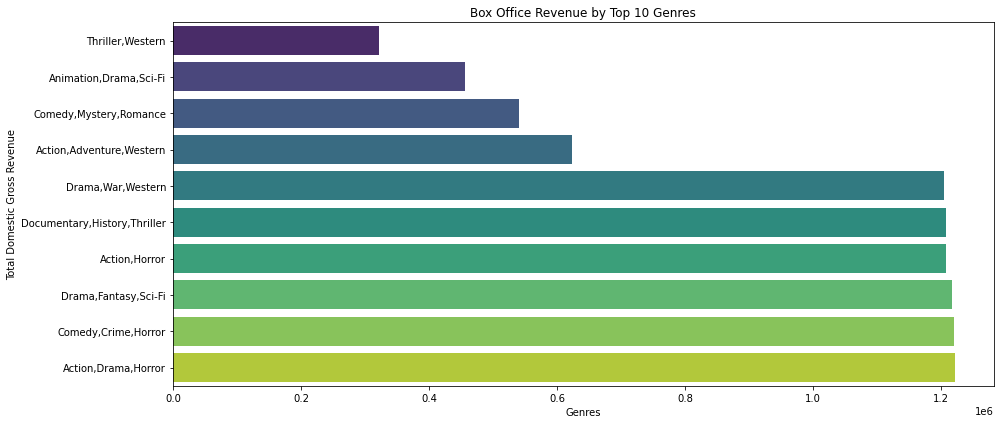

In [58]:
# Calculate total domestic gross revenue for each genre
genre_revenue = final_df.groupby('genres')['total_gross'].sum().sort_values(ascending=True).head(10)

# Plot the bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x= genre_revenue.values, y=genre_revenue.index, palette='viridis')
plt.xticks(rotation=0)
plt.title('Box Office Revenue by Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Total Domestic Gross Revenue')
plt.tight_layout()
plt.show()

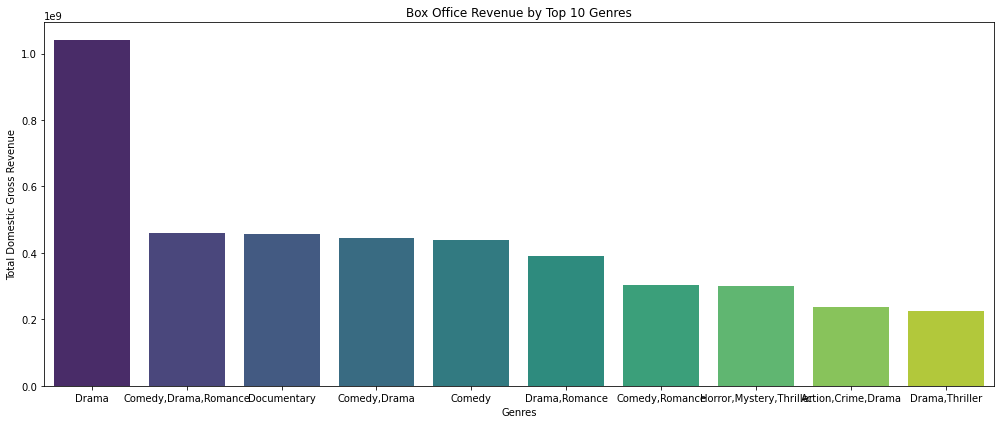

In [59]:
# Calculate total domestic gross revenue for each genre
genre_revenue = final_df.groupby('genres')['foreign_gross'].sum().sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette='viridis')
plt.xticks(rotation=0)
plt.title('Box Office Revenue by Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Total Domestic Gross Revenue')
plt.tight_layout()
plt.show()

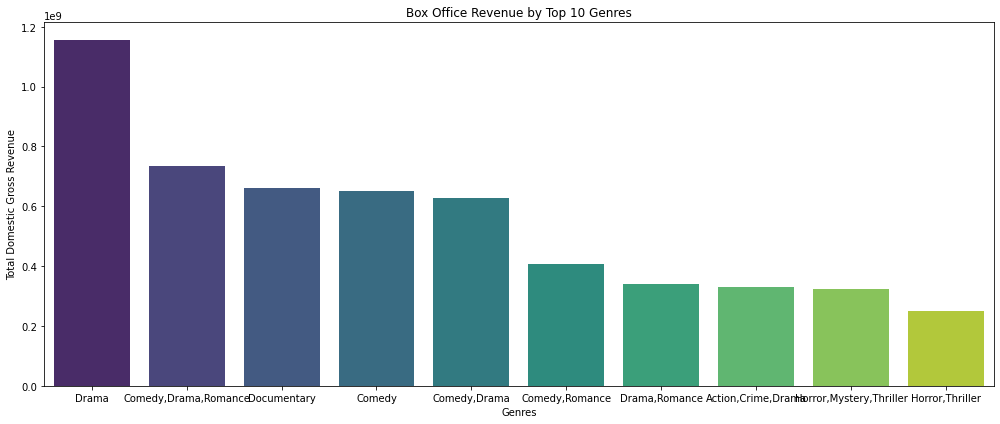

In [60]:
# Plot the bar chart

genre_revenue = final_df.groupby('genres')['domestic_gross'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette='viridis')
plt.xticks(rotation=0)
plt.title('Box Office Revenue by Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Total Domestic Gross Revenue')
plt.tight_layout()
plt.show()

### LINE GRAPH

A line graph is  for visualizing trends an in box office excellent success over time tool because it provides for a clear and visualizing continuous representation of trends changes in revenue in

1. **Identifying Patterns**:
    - A line graph can reveal patterns such as growth, decline, or stability in box office revenue over time.
    - Seasonal trends or periodic fluctuations can also be observed.

2. **Comparing Time Periods**:
    - It allows for easy comparison of box office performance across different years or decades.
    - Peaks and troughs in the graph can indicate years of exceptional success or underperformance.


 The line plot shows the trend of average domestic gross revenue over the years.
 Each point on the line represents the mean domestic gross revenue for movies released in a particular year.
 This visualization shows that Box movies have created more revenue over the recent years(2018) and a slight decline in the year 2014.



In [61]:
top_5_genres = movies_per_genre.head(5).index.tolist()
top_5_genres_df = final_df[final_df['genres'].isin(top_5_genres)]
top_5_genres

['Drama',
 'Documentary',
 'Comedy,Drama',
 'Comedy,Drama,Romance',
 'Drama,Romance']

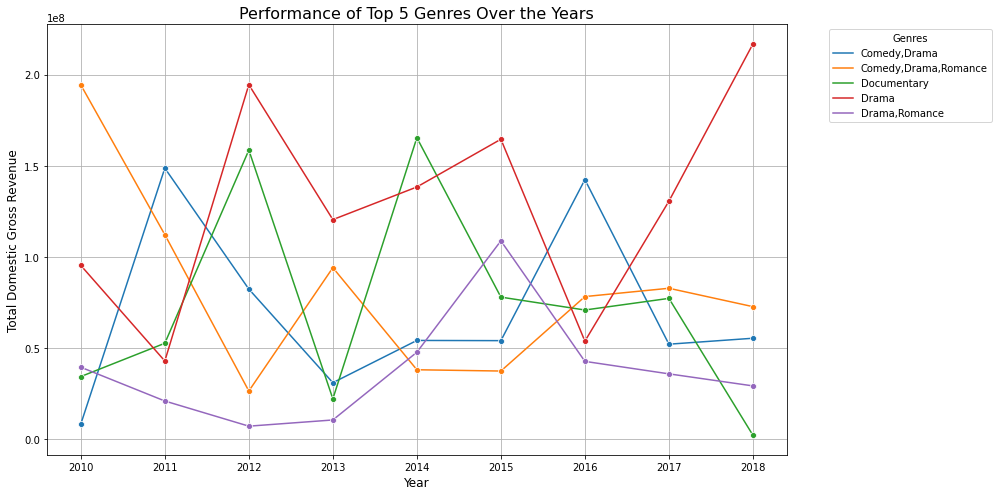

In [62]:
# Group the data by genres and year, and calculate the total domestic gross for each genre per year
# PLOT AGAINST THE TOTATL GROSS


genre_year_performance = top_5_genres_df.groupby(['genres', 'year'])['domestic_gross'].sum().reset_index()

# Plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=genre_year_performance, x='year', y='domestic_gross', hue='genres', marker='o')

# Add labels and title
plt.title('Performance of Top 5 Genres Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Domestic Gross Revenue', fontsize=12)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()